# CÁLCULO DE BETAS

## Autor: Lucía Saiz Lapique

__Práctica 2__

__Gestión de Activos y Carteras__

__CUNEF__

In [2]:
## importamos las librerías que necesitaremos
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import yfinance as yf

In [4]:
prueba = pd.read_csv('datos2.csv', delimiter = ';')
prueba.max()

Date          31/12/2019
IBEX             15945.7
SXXP               433.9
Telefónica       229.965
BBVA             192.917
Iberdrola        111.425
Inditex           36.665
dtype: object

A la hora de trabajar con los datos propuestos, se descubrió que había datos que estaban imputados erróneamente y, por tanto, se decide acceder a los datos de las mismas acciones en la base de datos original pero directamente de la página de yahoo finance. 

La razón por la que se considera que los datos propuestos no son correctos es que en varias de las acciones había fluctuaciones muy exageradas, con valores extremos que descendían muy pronunciadamente. Se comprobó la secuencia de estos datos en los últimos años y se descubrió que no era esa la serie que seguían. Por ejemplo, en el caso de Telefónica, en los datos propuestos existe un máximo de 229,96€, mientras que en los últimos 20 años, tras haber comprobado varias páginas con datos históricos de acciones de Telefónica, el máximo al que han llegado no supera los 23€. 

Tras comparar todos los datos, se descubrió que no eran los datos del excel de la práctica los que eran erróneos, sino que al pasarlos a formato csv, por alguna razo, el decimal se cambió de sitio en algunos casos (no en todos) y por tanto, no se pueden usar. 

Por ello y para no mezclar bases de datos, se decidió coger todos los datoss de los 4 activos y 2 índices de la misma página, como mencionamos anteriormente, de yahoo finance. Sabemos que son más fiables los de Bloomberg, pero carecemos de conocimiento para acceder a ellos de una forma tan sencilla como a los de yahoo con la librería yfinance.  

In [144]:
#define the ticker symbol
tickerSymbol = '^IBEX'
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)
#get the historical prices for this ticker
IBEX = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25').Close

In [145]:
#define the ticker symbol
tickerSymbol = 'TEF'
tickerData = yf.Ticker(tickerSymbol)
#get the historical prices for this ticker
TEF = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25').Close

In [146]:
#define the ticker symbol
tickerSymbol = 'BBVA'
tickerData = yf.Ticker(tickerSymbol)
#get the historical prices for this ticker
BBVA = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25').Close

In [154]:
#define the ticker symbol
tickerSymbol = 'IBE.MC'
tickerData = yf.Ticker(tickerSymbol)
#get the historical prices for this ticker
IBE = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25').Close

In [156]:
#define the ticker symbol
tickerSymbol = 'ITX.MC'
tickerData = yf.Ticker(tickerSymbol)
#get the historical prices for this ticker
ITX = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25').Close

In [151]:
#define the ticker symbol
tickerSymbol = '^STOXX'
tickerData = yf.Ticker(tickerSymbol)
#get the historical prices for this ticker
SXXP = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25').Close

In [157]:
datos = pd.DataFrame(IBEX)
datos['IBEX'] = datos.Close
datos.pop('Close')
datos.head()

,IBEX
Date,
2010-01-04,12145.09
2010-01-05,12204.39
2010-01-06,12222.49
2010-01-07,12166.29
2010-01-08,12162.99


In [158]:
datos['SXXP'] = SXXP
datos['Telefónica'] = TEF
datos['BBVA'] = BBVA
datos['Iberdrola'] = IBE
datos['Inditex'] = ITX
datos.tail()

,IBEX,SXXP,Telefónica,BBVA,Iberdrola,Inditex
Date,,,,,,
2020-01-20,9658.8,423.98,NaN,NaN,9.45,31.18
2020-01-21,9611.3,423.38,6.98,4.9206,9.43,31.28
2020-01-22,9573.7,423.04,6.93,4.8923,9.46,31.03
2020-01-23,9518.5,420.03,6.85,4.8734,9.67,31.02
2020-01-24,9562.0,423.64,6.71,4.7506,9.89,31.14


Eliminamos las observaciones que contengan valores nulos para que no estropeen el estudio

In [159]:
datos = datos.dropna()
datos.isnull().sum()

IBEX          0
SXXP          0
Telefónica    0
BBVA          0
Iberdrola     0
Inditex       0
dtype: int64

### 1. Calcular la beta de las acciones respecto a los indices

Como en la práctica anterior, calculamos los rendimientos de cada día para cada acción con respecto al día anterior. Con ellos, creamos una nueva base de datos a partir de la cual calcular las betas de los índices para cada
activo.

In [160]:
df = datos.pct_change().dropna()

In [161]:
df.tail()

,IBEX,SXXP,Telefónica,BBVA,Iberdrola,Inditex
Date,,,,,,
2020-01-17,0.011366,0.009559,0.008850,0.001871,0.009667,0.015026
2020-01-21,-0.007230,-0.002779,0.020468,-0.022507,0.003191,-0.014803
2020-01-22,-0.003912,-0.000803,-0.007163,-0.005751,0.003181,-0.007992
2020-01-23,-0.005766,-0.007115,-0.011544,-0.003863,0.022199,-0.000322
2020-01-24,0.004570,0.008595,-0.020438,-0.025198,0.022751,0.003868


In [162]:
df.loc['2019-01-25':,:] ## seleccionamos solo los datos del último año para una beta para más precisa

,IBEX,SXXP,Telefónica,BBVA,Iberdrola,Inditex
Date,,,,,,
2019-01-25,0.003847,0.006101,0.006855,0.028672,-0.005857,-0.012568
2019-01-28,-0.013369,-0.009669,0.003398,-0.004917,-0.001473,-0.021638
2019-01-29,0.006257,0.008042,-0.009035,-0.008229,0.010324,0.016912
2019-01-30,-0.005220,0.003583,-0.002282,0.008297,-0.004380,0.003412
2019-01-31,-0.001631,0.000446,-0.010288,-0.016476,0.013196,0.010200
...,...,...,...,...,...,...
2020-01-17,0.011366,0.009559,0.008850,0.001871,0.009667,0.015026
2020-01-21,-0.007230,-0.002779,0.020468,-0.022507,0.003191,-0.014803
2020-01-22,-0.003912,-0.000803,-0.007163,-0.005751,0.003181,-0.007992


In [163]:
beta = df.loc['2019-03-25':,:].cov().div(df.var()) ## matriz de covarianzas para calcular la beta
beta

,IBEX,SXXP,Telefónica,BBVA,Iberdrola,Inditex
IBEX,0.286014,0.435121,0.169499,0.138044,0.094840,0.234549
SXXP,0.226807,0.473466,0.131581,0.098689,0.059873,0.189943
Telefónica,0.255568,0.380614,0.432738,0.166882,0.049617,0.186173
BBVA,0.381522,0.523269,0.305894,0.420642,-0.090521,0.243999
Iberdrola,0.108039,0.130849,0.037487,-0.037311,0.414505,0.078371
Inditex,0.291505,0.452885,0.153458,0.109723,0.085503,0.633719


In [184]:
# generamos una funcion para graficar la beta de cada activo con respecto a indice
def plot_regression(returns, asset, indice):
    plt.figure(figsize = (10,5))
    sns.scatterplot(indice, asset, data = returns,
                   hue = returns.index.year, alpha = 0.6, legend = False)
    sns.regplot(indice, asset, data = returns, scatter = False, color = 'crimson')

A continuación vemos una tabla con las betas de cada acción en relación con el primer índice: IBEX 35, además de su representación gráfica.

In [165]:
beta_ib = beta['IBEX'].to_frame('IBEX').T.loc[:,['Telefónica','BBVA','Iberdrola','Inditex']]
beta_ib

,Telefónica,BBVA,Iberdrola,Inditex
IBEX,0.255568,0.381522,0.108039,0.291505


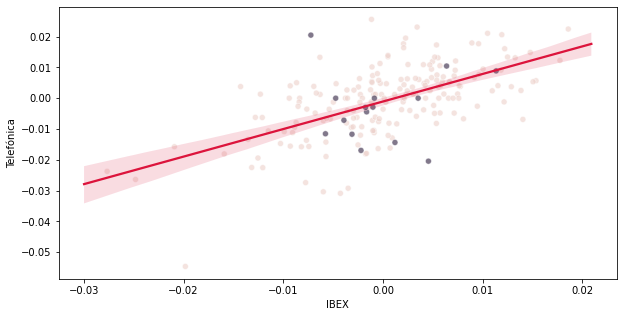

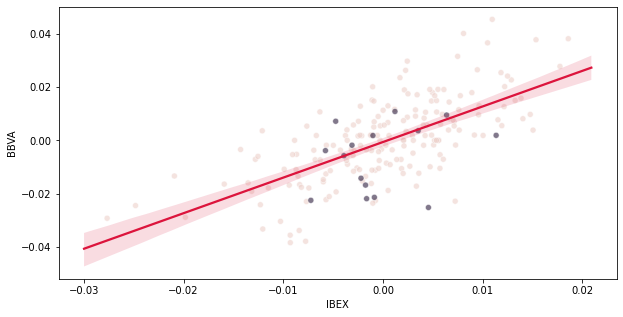

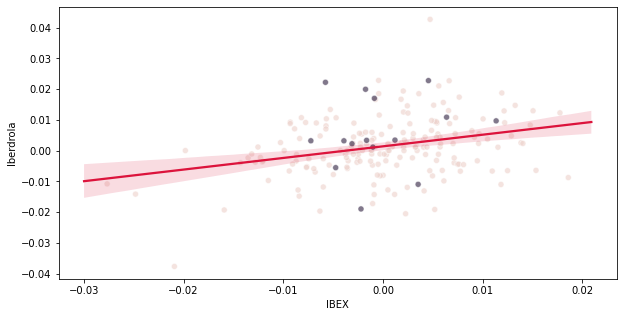

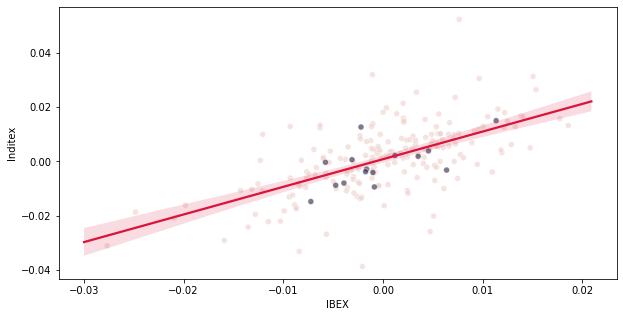

In [166]:
plot_regression(df.loc['2019-03-25':,:], 'Telefónica', 'IBEX')
plot_regression(df.loc['2019-03-25':,:], 'BBVA', 'IBEX')
plot_regression(df.loc['2019-03-25':,:], 'Iberdrola', 'IBEX')
plot_regression(df.loc['2019-03-25':,:], 'Inditex', 'IBEX')

A continuación vemos una tabla con las betas de cada acción en relación con el segundo índice: Stoxx 600, además de su representación gráfica.

In [167]:
beta_sx = beta['SXXP'].to_frame('SXXP').T.loc[:,['Telefónica','BBVA','Iberdrola','Inditex']]
beta_sx

,Telefónica,BBVA,Iberdrola,Inditex
SXXP,0.380614,0.523269,0.130849,0.452885


Busca los las betas de los activos con respecto a sus indices

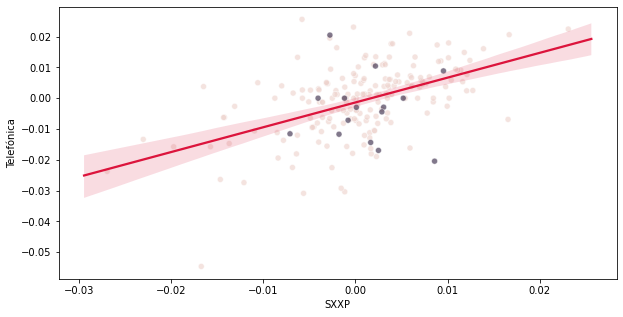

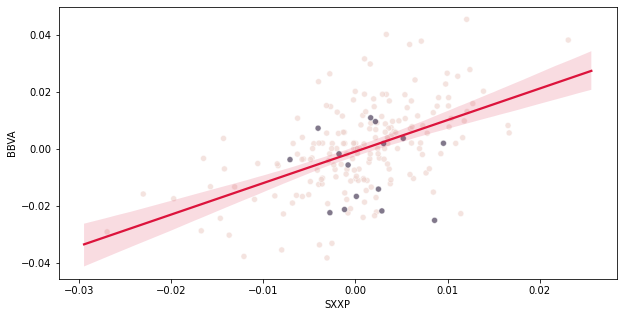

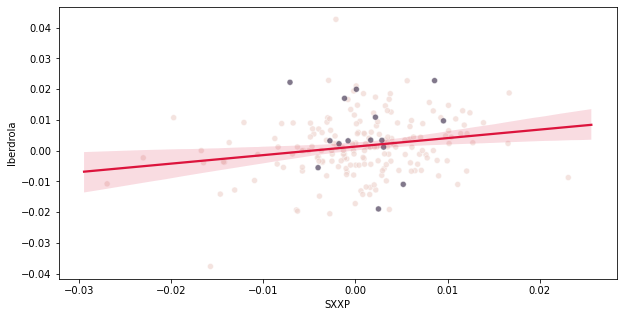

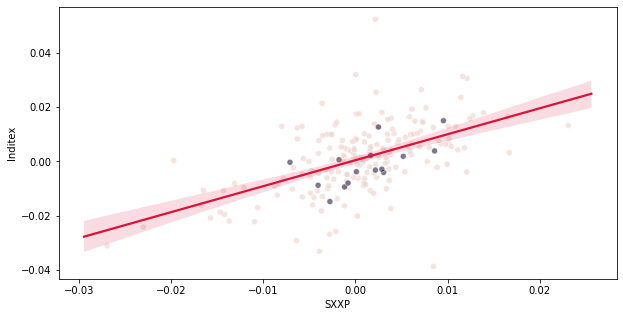

In [168]:
plot_regression(df.loc['2019-03-25':,:], 'Telefónica', 'SXXP')
plot_regression(df.loc['2019-03-25':,:], 'BBVA', 'SXXP')
plot_regression(df.loc['2019-03-25':,:], 'Iberdrola', 'SXXP')
plot_regression(df.loc['2019-03-25':,:], 'Inditex', 'SXXP')

### 2. Construir una cartera de activos y hallar la rentabilidad, volatilidad y beta de la cartera

Una vez obtenidas las betas de cada activo en relación con los índices, podemos generar una cartera con una serie de pesos y rendimientos para calcular su beta. A continuación, seleccionamos los pesos para la cartera en función del coste más reciente de cada activo en comparación con los demás de la cartera.

Para esta cartera, a diferencia de la generada para el cálculo de la frontera eficiente, no incluimos los índices, pues la beta estaría mal calculada. 

In [169]:
## pesos
total = datos['Telefónica'][-1] + datos['BBVA'][-1] + datos['Iberdrola'][-1] + datos['Inditex'][-1]

#Creamos matriz de pesos para cada activo ("Equally weighted")
weights = [datos['Telefónica'][-1]/total, datos['BBVA'][-1]/total,  datos['Iberdrola'][-1]/total,
           datos['Inditex'][-1]/total]

In [170]:
w = np.array(weights)
r = np.array(np.mean(df.loc[:,['Telefónica','BBVA','Iberdrola','Inditex']])).mean()
C = np.cov(df.loc[:,['Telefónica','BBVA','Iberdrola','Inditex']].transpose())
def sigma(w, C):
    '''Desv STD portadolio anualizada'''
    return np.dot(w,np.dot(C,w.T)) ** (1/2) * 252 ** (1/2)
desv = sigma(w, C)

#Validamos
print("Pesos activos:", w)
print("Rendimiento esperado:", r)
print('Volatilidad esperada:', desv)

Pesos activos: [0.12783241 0.09050382 0.18841469 0.59324908]
Rendimiento esperado: 0.000297056892765653
Volatilidad esperada: 0.21715346594379994


A continuación, el valor de la beta en nuestra cartera generada.

In [171]:
a = beta_ib*weights
beta_cartera_ib = a.T.sum().values
beta_cartera_ib ##esta seria la beta de la cartera en función del índice del IBEX

array([0.26049009])

In [172]:
b = beta_sx*weights
beta_cartera_sx = b.T.sum().values
beta_cartera_sx ##esta seria la beta de la cartera en función del índice del Stoxx 600

array([0.38934018])

### 3. Neutralizar la beta de la cartera

Para neutralizar la beta de la cartera, elegimos un valor del importe que se desearía realizar y medimos los siguientes valores:
* la posición de cobertura (Consiste en hacer apuestas bajistas sobre valores o mercados. Implementación de posiciones cortas sobre acciones sobrevalorados para compensar las pérdidas de las acciones comprados cuando caen los mercados)
* la exposición bruta de la cartera: % en posiciones largas + % en posiciones cortas
* la exposición neta de la cartera: % en posiciones largas - % en posiciones cortas.

El gestor realiza una selección de títulos de renta variable de acuerdo al análisis que realiza de compañías y su visión alcista o bajista del mercado. La flexibilidad que tiene le permite buscar estrategias con un riesgo inferior al de invertir directamente en el mercado de renta variable. En este caso, nuestra beta es bajista (menor que uno) en ambos casos.

In [173]:
importe = 1000 

__Posición de cobertura:__

In [174]:
nominal_ib = importe*-beta_cartera_ib
nominal_sx = importe*-beta_cartera_sx
nominal_ib, nominal_sx

(array([-260.49008525]), array([-389.34018287]))

__Exposicion Neta de la cartera__

In [175]:
exposicion_ib = importe - nominal_ib
exposicion_sx = importe - nominal_sx
exposicion_ib, exposicion_sx

(array([1260.49008525]), array([1389.34018287]))

__Exposicion Bruta de la cartera__

In [176]:
exposicion_ib2 = importe + nominal_ib
exposicion_sx2 = importe + nominal_sx
exposicion_ib2, exposicion_sx2

(array([739.50991475]), array([610.65981713]))

### Gráficos:

In [177]:
cartera = datos.loc[:,['Telefónica','BBVA','Iberdrola','Inditex']]*weights
cartera['Suma'] = cartera.sum(axis = 1)
cartera.tail()

,Telefónica,BBVA,Iberdrola,Inditex,Suma
Date,,,,,
2020-01-17,0.874374,0.455587,1.771098,18.835658,21.936717
2020-01-21,0.892270,0.445333,1.776751,18.556831,21.671185
2020-01-22,0.885879,0.442772,1.782403,18.408519,21.519572
2020-01-23,0.875652,0.441061,1.821970,18.402586,21.541270
2020-01-24,0.857755,0.429947,1.863421,18.473776,21.624900


A continuación, unos gráficos comparativos de los activos en cuestión con nuestra cartera.

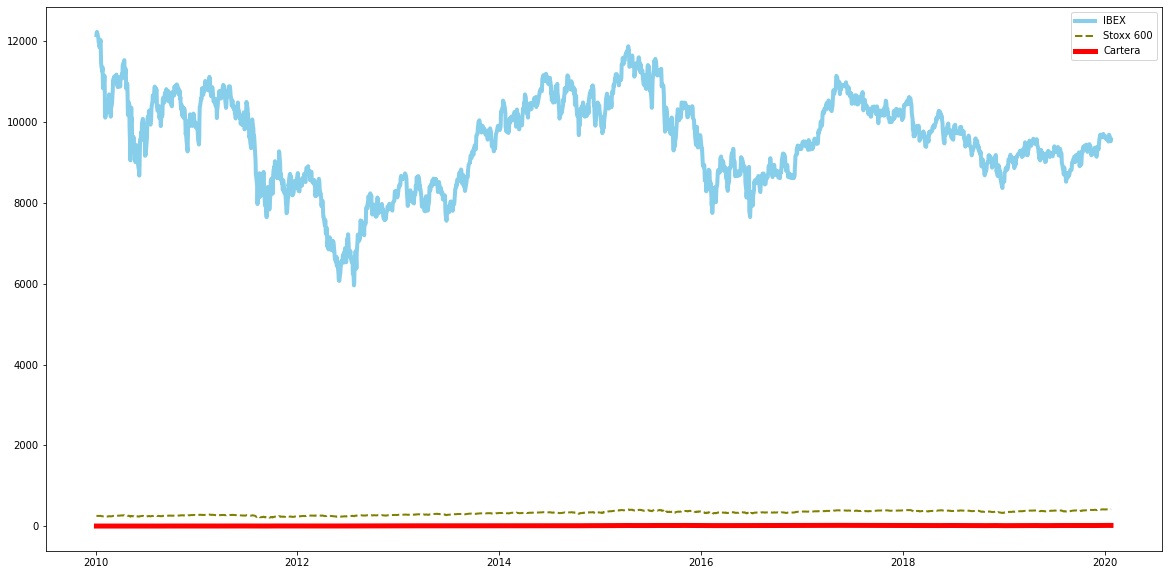

In [183]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['IBEX'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'IBEX')
plt.plot(datos.index, datos['SXXP'], marker='', color='olive', linewidth=2, linestyle='dashed', label = "Stoxx 600")
plt.plot(cartera.index, cartera['Suma'], marker='', color='red', linewidth=5, label = 'Cartera')
plt.legend()

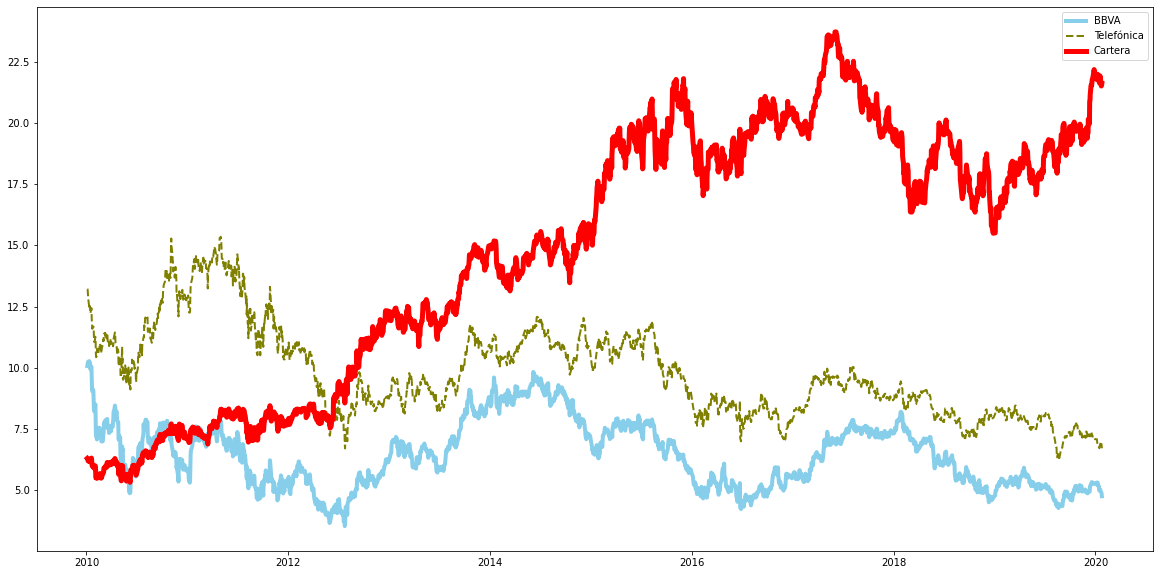

In [182]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['BBVA'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'BBVA')
plt.plot(datos.index, datos['Telefónica'], marker='', color='olive', linewidth=2, linestyle='dashed', label="Telefónica")
plt.plot(cartera.index, cartera['Suma'], marker='', color='red', linewidth=5, label = 'Cartera')
plt.legend()

__Bibliografía:__

* http://amarjen.github.io/calcular-beta-python.html#.XqR0HmgzZPY
* https://www.saladeinversion.com/articulos/evolucion-de-la-beta-en-los-sectores-del-sp500-con-python/